# Principal Component Analysis of CIFAR-100 Dataset

---

### CIFAR-100 dataset
The CIFAR-100 (Canadian Institute for Advanced Research - 100) dataset is a widely used benchmark in computer vision and machine learning. It is a labeled dataset for object recognition tasks. It is an extension of the CIFAR-10 dataset, containing 100 fine-grained classes instead of 10. Each image in the dataset is a color image with dimensions of 32x32 pixels. These are relatively small images, making the dataset suitable for quick experimentation and testing of algorithms.

<br>

The dataset comprises 60,000 images, with 500 training images and 100 test images per class. This results in a balanced distribution of images across classes. The 100 classes are organized into 20 superclasses, with each superclass containing five fine-grained classes.

<br>

The dataset covers a diverse range of object categories, including animals, plants, vehicles, household items, and more. CIFAR-100 presents challenges due to the small image size and the fine-grained nature of the classes. It is often used for tasks such as image classification, object recognition, and the evaluation of deep learning models.

<br>

---

### Principal Component Analysis of CIFAR-100 Dataset

PCA (Principal Component Analysis) is a dimensionality reduction technique commonly used in machine learning and data analysis. The main goal of PCA is to transform a high-dimensional dataset into a lower-dimensional space while retaining as much of the original variability as possible. It achieves this by identifying the principal components, which are linear combinations of the original features.

<br>

Visualizing the CIFAR-100 dataset using PCA can provide valuable insights into the distribution and structure of the data. Here are several ways in which PCA visualization can aid in data exploration:

1. **Dimensionality reduction** - makes it easier to understand the overall structure of the dataset.

2. **Pattern and cluster recognition** - helps to observe whether certain classes or groups of classes form distinct clusters or if there are overlaps.

3. **Outlier detection** - identifies unusual patterns or data points that do not conform to the general structure of the dataset, aiding in the detection of potential anomalies.

4. **Data separation and discrimination** - helps visualize how well-separated different classes are in the reduced-dimensional space. If classes are well-separated, it suggests that the features captured by the principal components are discriminative for class distinctions.

5. **Correlation between classes** - reveals relationships or correlations between different classes. For example, if certain classes exhibit similar patterns in the reduced space, it might indicate similarities in the underlying features.

<br>

However, while PCA is a powerful tool for exploration, it might not capture all aspects of the data, especially if nonlinear relationships exist. In such cases, more advanced dimensionality reduction techniques or manifold learning methods may be considered.

<br>

### Import libraries

In [12]:
import tensorflow as tf
from tensorflow.keras import datasets

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

<br>

### Loading the dataset


Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


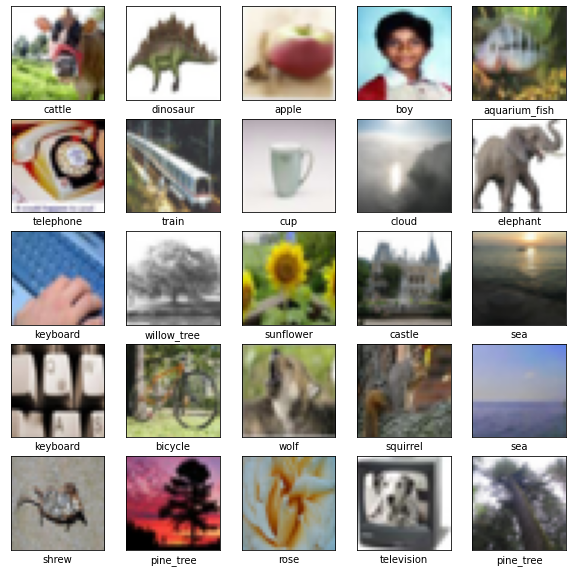

In [13]:
# Load CIFAR-100 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar100.load_data()

# Display dataset information
print("\nTraining data shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("Test data shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

# Visualize some sample images
class_names = [
    "apple", "aquarium_fish", "baby", "bear", "beaver", "bed", "bee", "beetle",
    "bicycle", "bottle", "bowl", "boy", "bridge", "bus", "butterfly", "camel",
    "can", "castle", "caterpillar", "cattle", "chair", "chimpanzee", "clock",
    "cloud", "cockroach", "couch", "crab", "crocodile", "cup", "dinosaur",
    "dolphin", "elephant", "flatfish", "forest", "fox", "girl", "hamster",
    "house", "kangaroo", "keyboard", "lamp", "lawn_mower", "leopard", "lion",
    "lizard", "lobster", "man", "maple_tree", "motorcycle", "mountain", "mouse",
    "mushroom", "oak_tree", "orange", "orchid", "otter", "palm_tree", "pear",
    "pickup_truck", "pine_tree", "plain", "plate", "poppy", "porcupine",
    "possum", "rabbit", "raccoon", "ray", "road", "rocket", "rose", "sea",
    "seal", "shark", "shrew", "skunk", "skyscraper", "snail", "snake", "spider",
    "squirrel", "streetcar", "sunflower", "sweet_pepper", "table", "tank",
    "telephone", "television", "tiger", "tractor", "train", "trout", "tulip",
    "turtle", "wardrobe", "whale", "willow_tree", "wolf", "woman", "worm"
]

# Display sample images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

<br>

### Plotting 2D PCA
This involves the following steps:
1. Flatten the images.
2. Standardize the data.
3. Apply PCA with two components.
4. Plot the 2D PCA with labels colored according to the original CIFAR-100 classes.

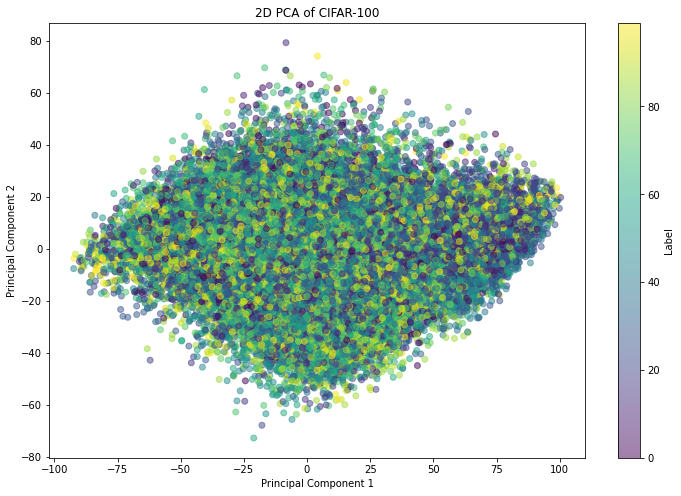

In [20]:
# Flatten the images
train_images_flat = train_images.reshape(train_images.shape[0], -1)

# Standardize the data using StandardScaler()
scaler = StandardScaler()
train_images_standardized = scaler.fit_transform(train_images_flat)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
principal_components = pca.fit_transform(train_images_standardized)

# Create a DataFrame for better visualization
df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df['Label'] = train_labels.flatten()

# Plot 2D PCA
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['PC1'], df['PC2'], c=df['Label'], cmap='viridis', alpha=0.5)
plt.title('2D PCA of CIFAR-100')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Label')
plt.show()

In [21]:
# Proportion of variability explained by the first two principal components
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Proportion of variability explained by PC1: {explained_variance_ratio[0] * 100:.2f}%")
print(f"Proportion of variability explained by PC2: {explained_variance_ratio[1] * 100:.2f}%")
print(f"Proportion of variability explained by PC1 and PC2: {np.sum(pca.explained_variance_ratio_) * 100:.2f}%")

Proportion of variability explained by PC1: 31.68%
Proportion of variability explained by PC2: 9.10%
Proportion of variability explained by PC1 and PC2: 40.78%


<br>

The fact that PC1 explains a relatively large portion (31.68%) of the variability suggests that there are significant patterns or structures in the data that can be captured by this principal component. While PC2 contributes to the overall variability, it explains a smaller proportion (9.10%).

The goal of PCA is often to reduce the dimensionality of the data while retaining as much information as possible. In this case, the first two principal components capture a moderate amount of variability (40.78% total), and more components may be needed to retain more information and capture all the nuances present in the original high-dimensional data.

<br>